In [55]:
import pandas as pd
import matplotlib.pyplot as pltdf
import seaborn as sns
ac= pd.read_csv("C:\\Users\\nicol\\Desktop\\financial_risk_assessment2.csv")


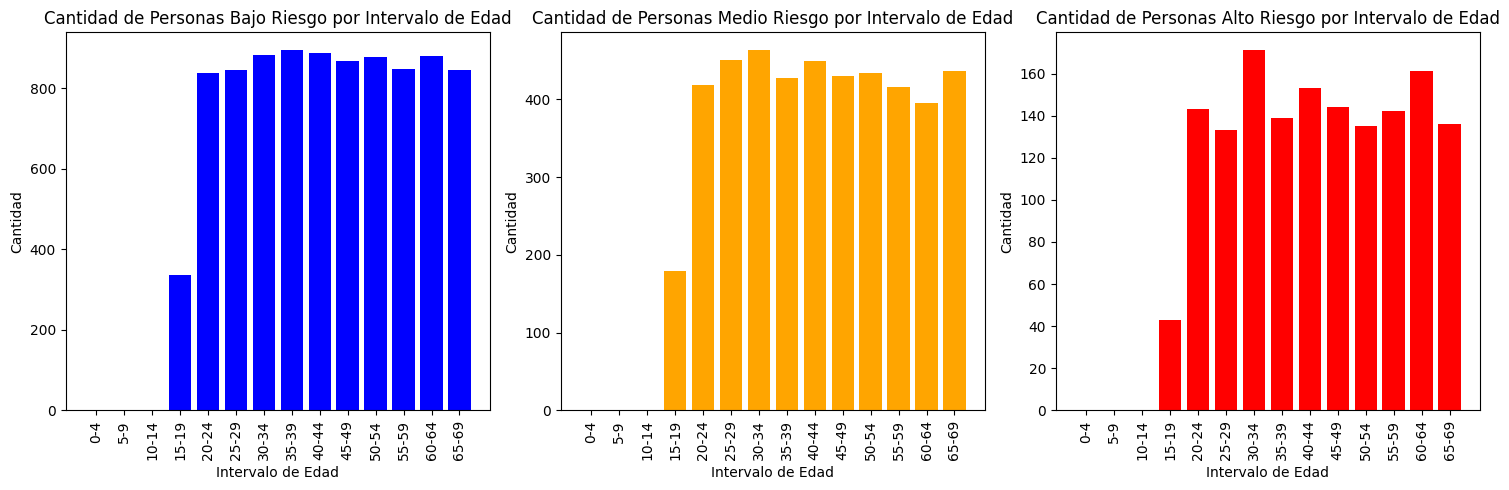

In [72]:
#Intervalos de edad
intervalo = range(0, ac['Age'].max() + 5, 5)
etiqueta = [f'{i}-{i+4}' for i in intervalo[:-1]]

# Agregar una columna de intervalos de edad al DataFrame
ac['intervalo por edad'] = pd.cut(ac['Age'], bins=intervalo, labels=etiqueta, right=False)

# Filtro por cada nivel de riesgo
rankingderiesgo_bajo = ac[ac['Risk Rating'] == 'Low']
rankingderiesgo_medio = ac[ac['Risk Rating'] == 'Medium']
rankingderiesgo_alto = ac[ac['Risk Rating'] == 'High']

# Contar por intervalo de edad para cada nivel de riesgo
contar_bajo_riesgo = rankingderiesgo_bajo['intervalo por edad'].value_counts().sort_index().reset_index()
contar_medio_riesgo = rankingderiesgo_medio['intervalo por edad'].value_counts().sort_index().reset_index()
contar_alto_riesgo = rankingderiesgo_alto['intervalo por edad'].value_counts().sort_index().reset_index()

# Renombrar las columnas
contar_bajo_riesgo.columns = ['intervalo por edad', 'cantidad de personas bajo riesgo']
contar_medio_riesgo.columns = ['intervalo por edad', 'cantidad de personas medio riesgo']
contar_alto_riesgo.columns = ['intervalo por edad', 'cantidad de personas alto riesgo']

# Configurar la figura para los gráficos
plt.figure(figsize=(15, 5))

# Graficar la tabla de riesgo bajo
# Añadir los números en cada barra


plt.subplot(1, 3, 1)
plt.bar(contar_bajo_riesgo['intervalo por edad'], contar_bajo_riesgo['cantidad de personas bajo riesgo'], color='blue')
plt.title('Cantidad de Personas Bajo Riesgo por Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Graficar la tabla de riesgo medio
plt.subplot(1, 3, 2)
plt.bar(contar_medio_riesgo['intervalo por edad'], contar_medio_riesgo['cantidad de personas medio riesgo'], color='orange')
plt.title('Cantidad de Personas Medio Riesgo por Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Graficar la tabla de riesgo alto
plt.subplot(1, 3, 3)
plt.bar(contar_alto_riesgo['intervalo por edad'], contar_alto_riesgo['cantidad de personas alto riesgo'], color='red')
plt.title('Cantidad de Personas Alto Riesgo por Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Grafico 1  
En este gráfico se observa que las personas que presentan un alto riesgo de pago son personas entre 30-34 años, seguidas por personas de edad entre 60-64 años. 

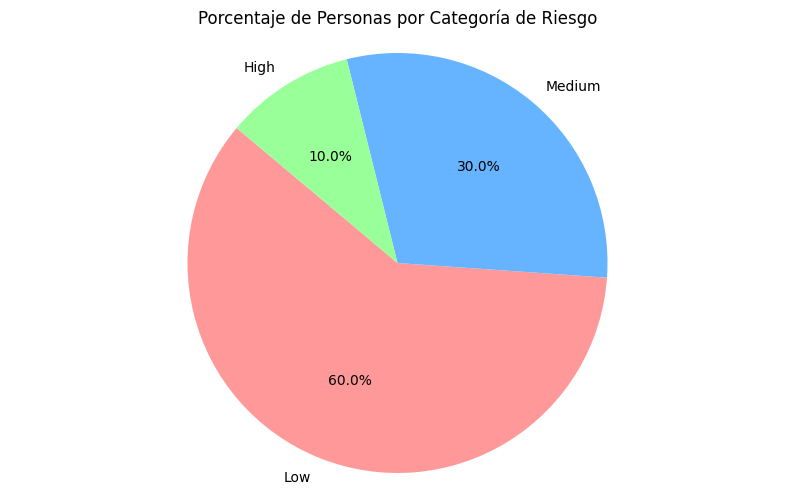

In [80]:

# Calcular el porcentaje de personas en cada categoría de riesgo
risk_counts = ac['Risk Rating'].value_counts(normalize=True) * 100

# Crear una lista de colores amigables
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#ffb347','#d3d3d3']

# Crear la gráfica de torta
plt.figure(figsize=(10, 6))
plt.pie(risk_counts, labels=risk_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de Personas por Categoría de Riesgo')
plt.show()



Grafico 2  
El gráfico de torta ilustra que es considerable mencionar que las personas de alto riesgo corresponden a un 10% de la muestra. 

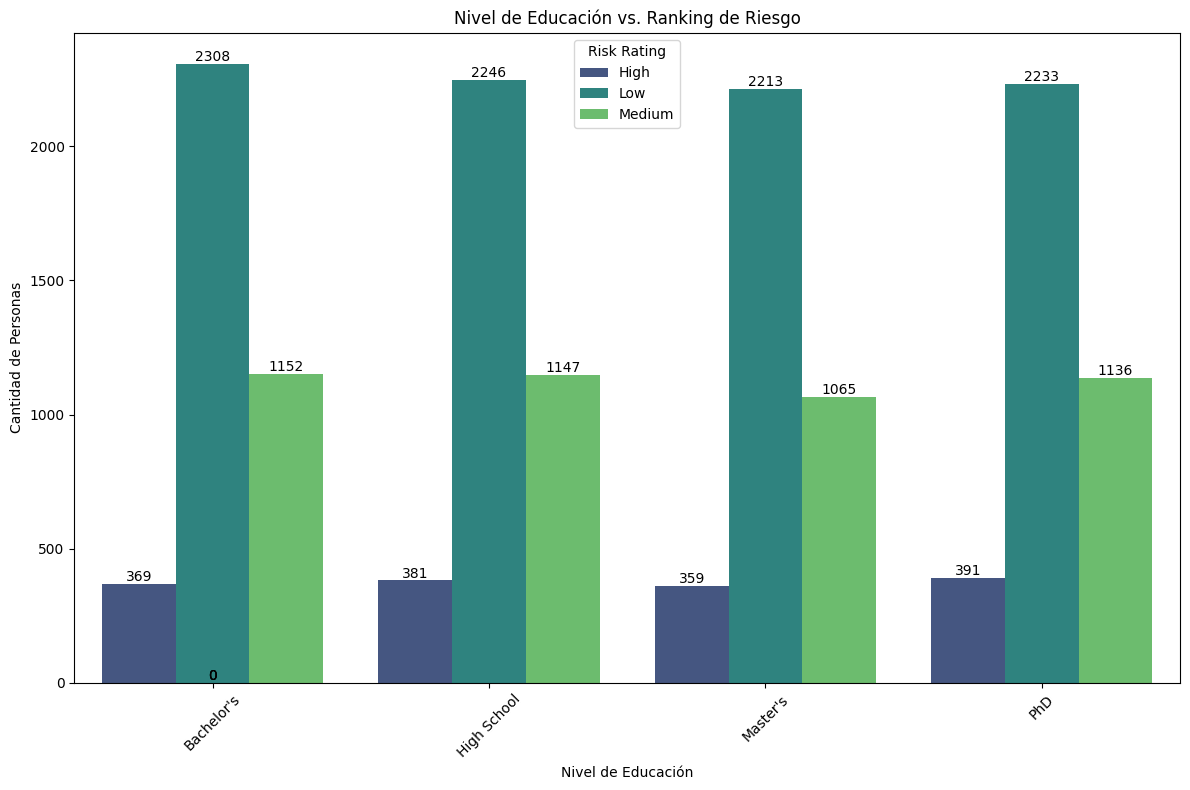

In [74]:
# Contar las ocurrencias por nivel de educación y ranking de riesgo
contar = ac.groupby(['Education Level', 'Risk Rating']).size().reset_index(name='count')

# Configurar la figura para el gráfico
plt.figure(figsize=(12, 8))

# Graficar los datos
barplot = sns.barplot(data=contar, x='Education Level', y='count', hue='Risk Rating', palette='viridis')

# Añadir los números en cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Títulos y etiquetas
plt.title('Nivel de Educación vs. Ranking de Riesgo')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Grafico 3  
Podemos concluir que dentro del grupo de alto riesgo lo lideran las personas con doctorado, seguidas por las personas con educación media.

C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\3812088662.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contar = datos_filtrados.groupby(['intervalo por edad', 'Risk Rating']).size().reset_index(name='count')
C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\3812088662.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contar = datos_filtrados.groupby(['intervalo por edad', 'Risk Rating']).size().reset_index(name='count')
C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\3812088662.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of 

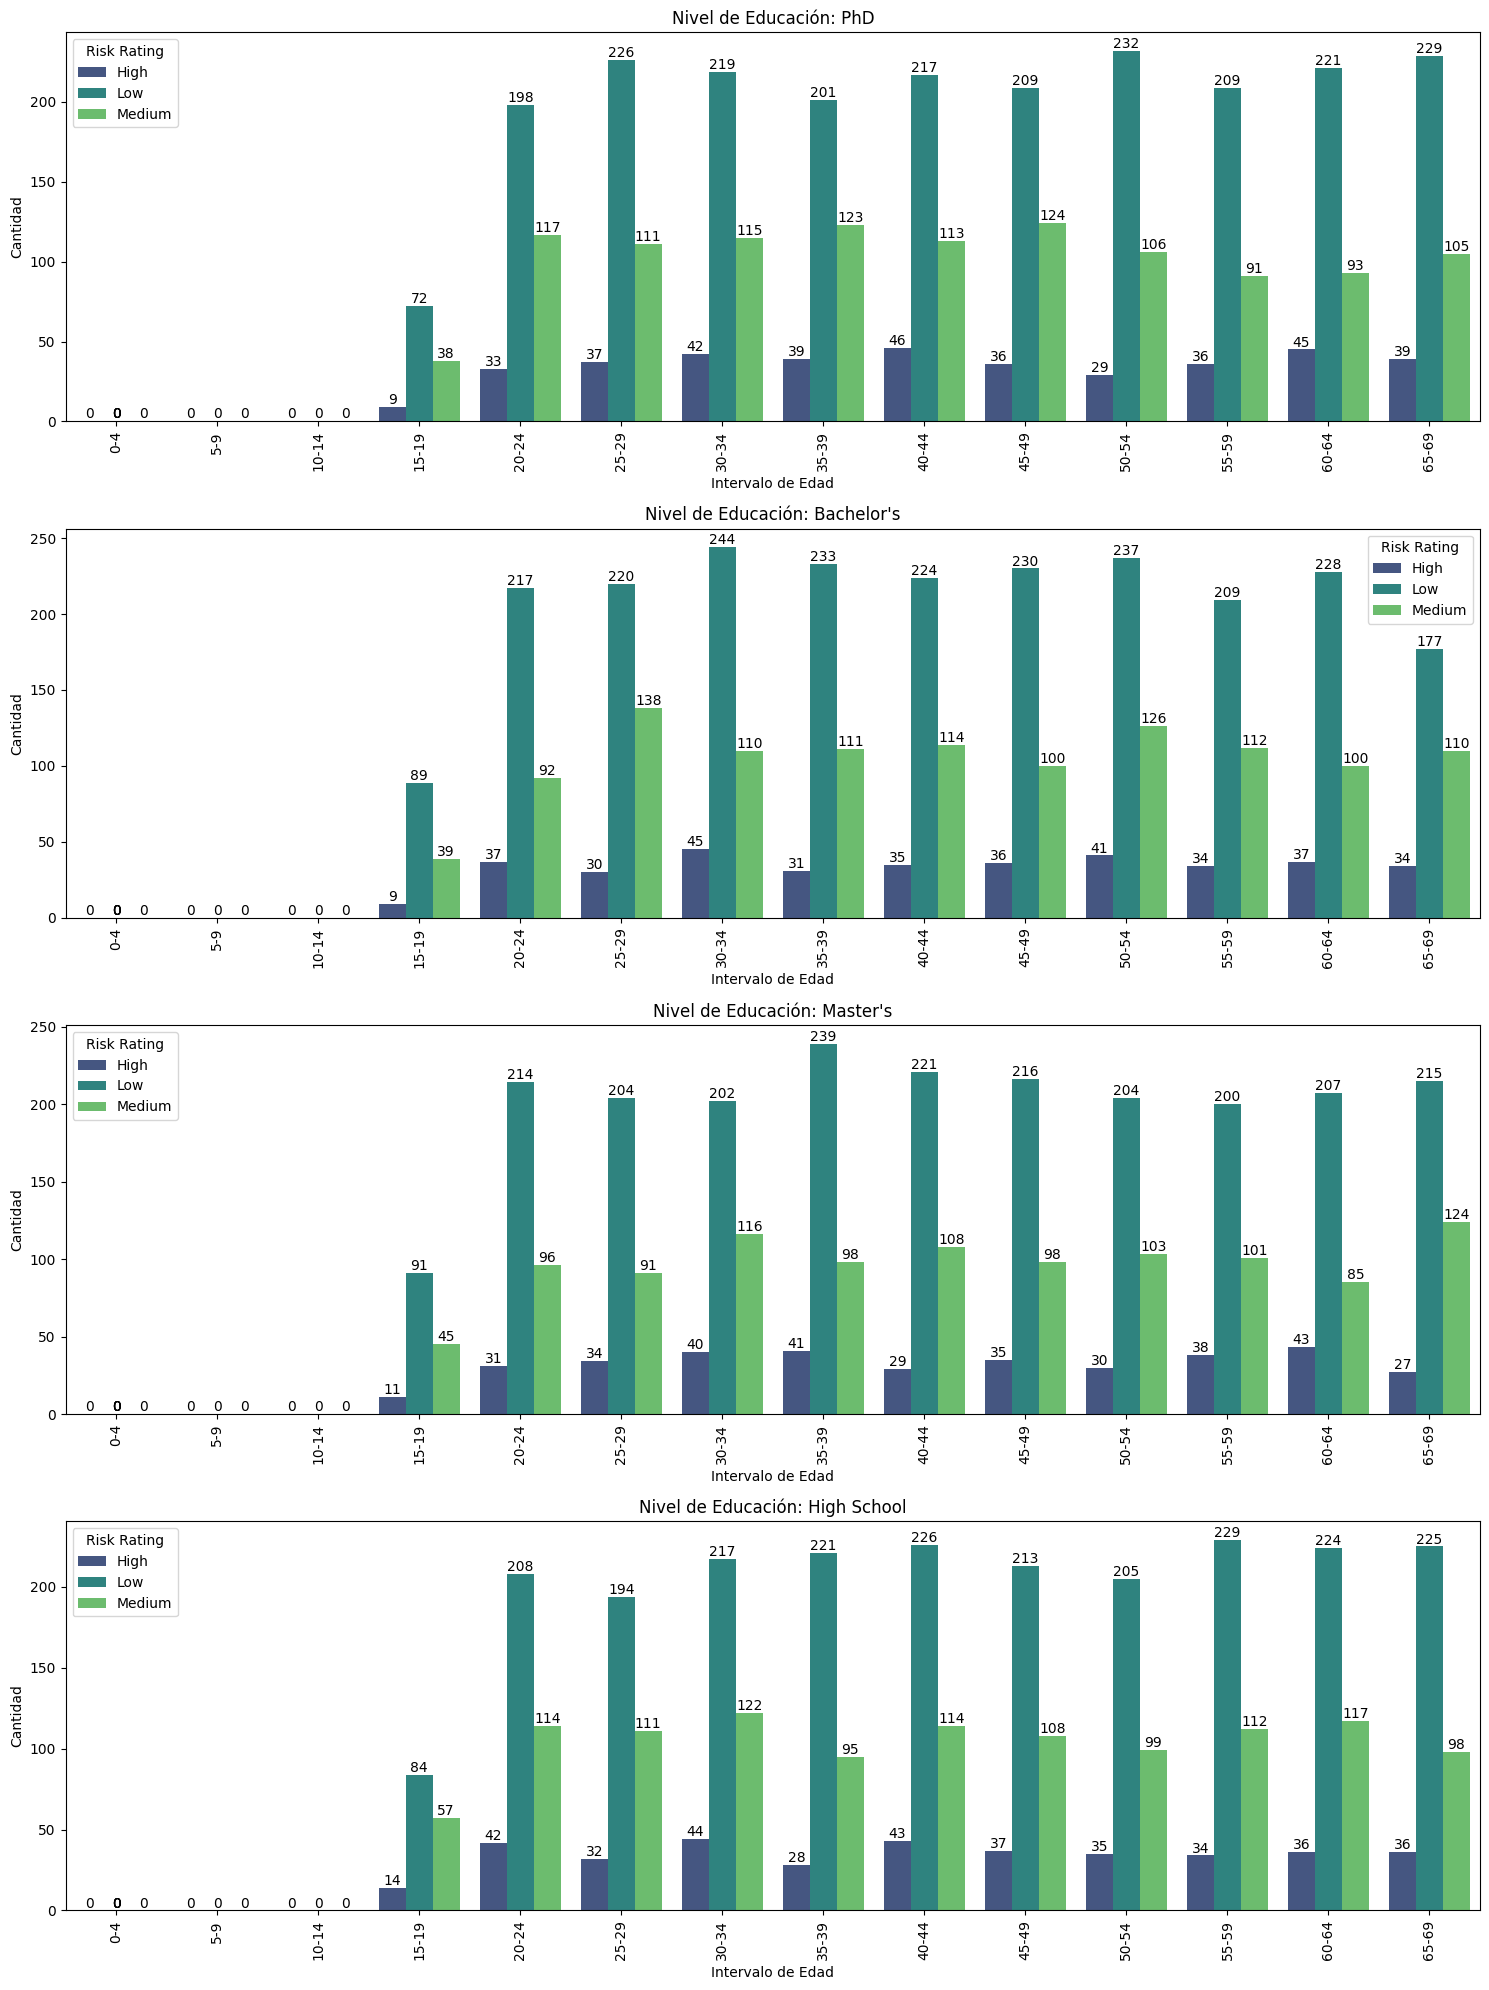

In [75]:
# Intervalos de edad
intervalo = range(0, ac['Age'].max() + 5, 5)
etiqueta = [f'{i}-{i+4}' for i in intervalo[:-1]]

# Agregar una columna de intervalos de edad al DataFrame
ac['intervalo por edad'] = pd.cut(ac['Age'], bins=intervalo, labels=etiqueta, right=False)

# Niveles de educación únicos
niveles_educacion = ac['Education Level'].unique()

# Configurar la figura para los gráficos
plt.figure(figsize=(15, len(niveles_educacion) * 5))

# Generar un gráfico para cada nivel de educación
for i, nivel in enumerate(niveles_educacion, 1):
    plt.subplot(len(niveles_educacion), 1, i)
    datos_filtrados = ac[ac['Education Level'] == nivel]
    
    # Crear un DataFrame agrupado por intervalo de edad y ranking de riesgo
    contar = datos_filtrados.groupby(['intervalo por edad', 'Risk Rating']).size().reset_index(name='count')
    
    # Graficar los datos
    barplot = sns.barplot(data=contar, x='intervalo por edad', y='count', hue='Risk Rating', palette='viridis', ax=plt.gca())
    plt.title(f'Nivel de Educación: {nivel}')
    plt.xlabel('Intervalo de Edad')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=90)

    # Añadir los números en cada barra
    for p in barplot.patches:
        height = p.get_height()
        barplot.annotate(f'{int(height)}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='center', 
                         xytext=(0, 5), 
                         textcoords='offset points')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Grafico 4  
Al agregar el factor de edad al punto anterior, podemos notar que el pico de riesgo para los grupos de preparatoria y pregrado es alrededor de los 30-34 años  
En el caso del segundo grupo, maestría y doctorado, esto ocurre más adelante, a los 40-44 y 60-64 años respectivamente.

C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\1326810945.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contar = datos_filtrados.groupby(['intervalo por edad']).size().reset_index(name='count')
C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\1326810945.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=contar, x='intervalo por edad', y='count', palette='viridis', ax=plt.gca())
C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\1326810945.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

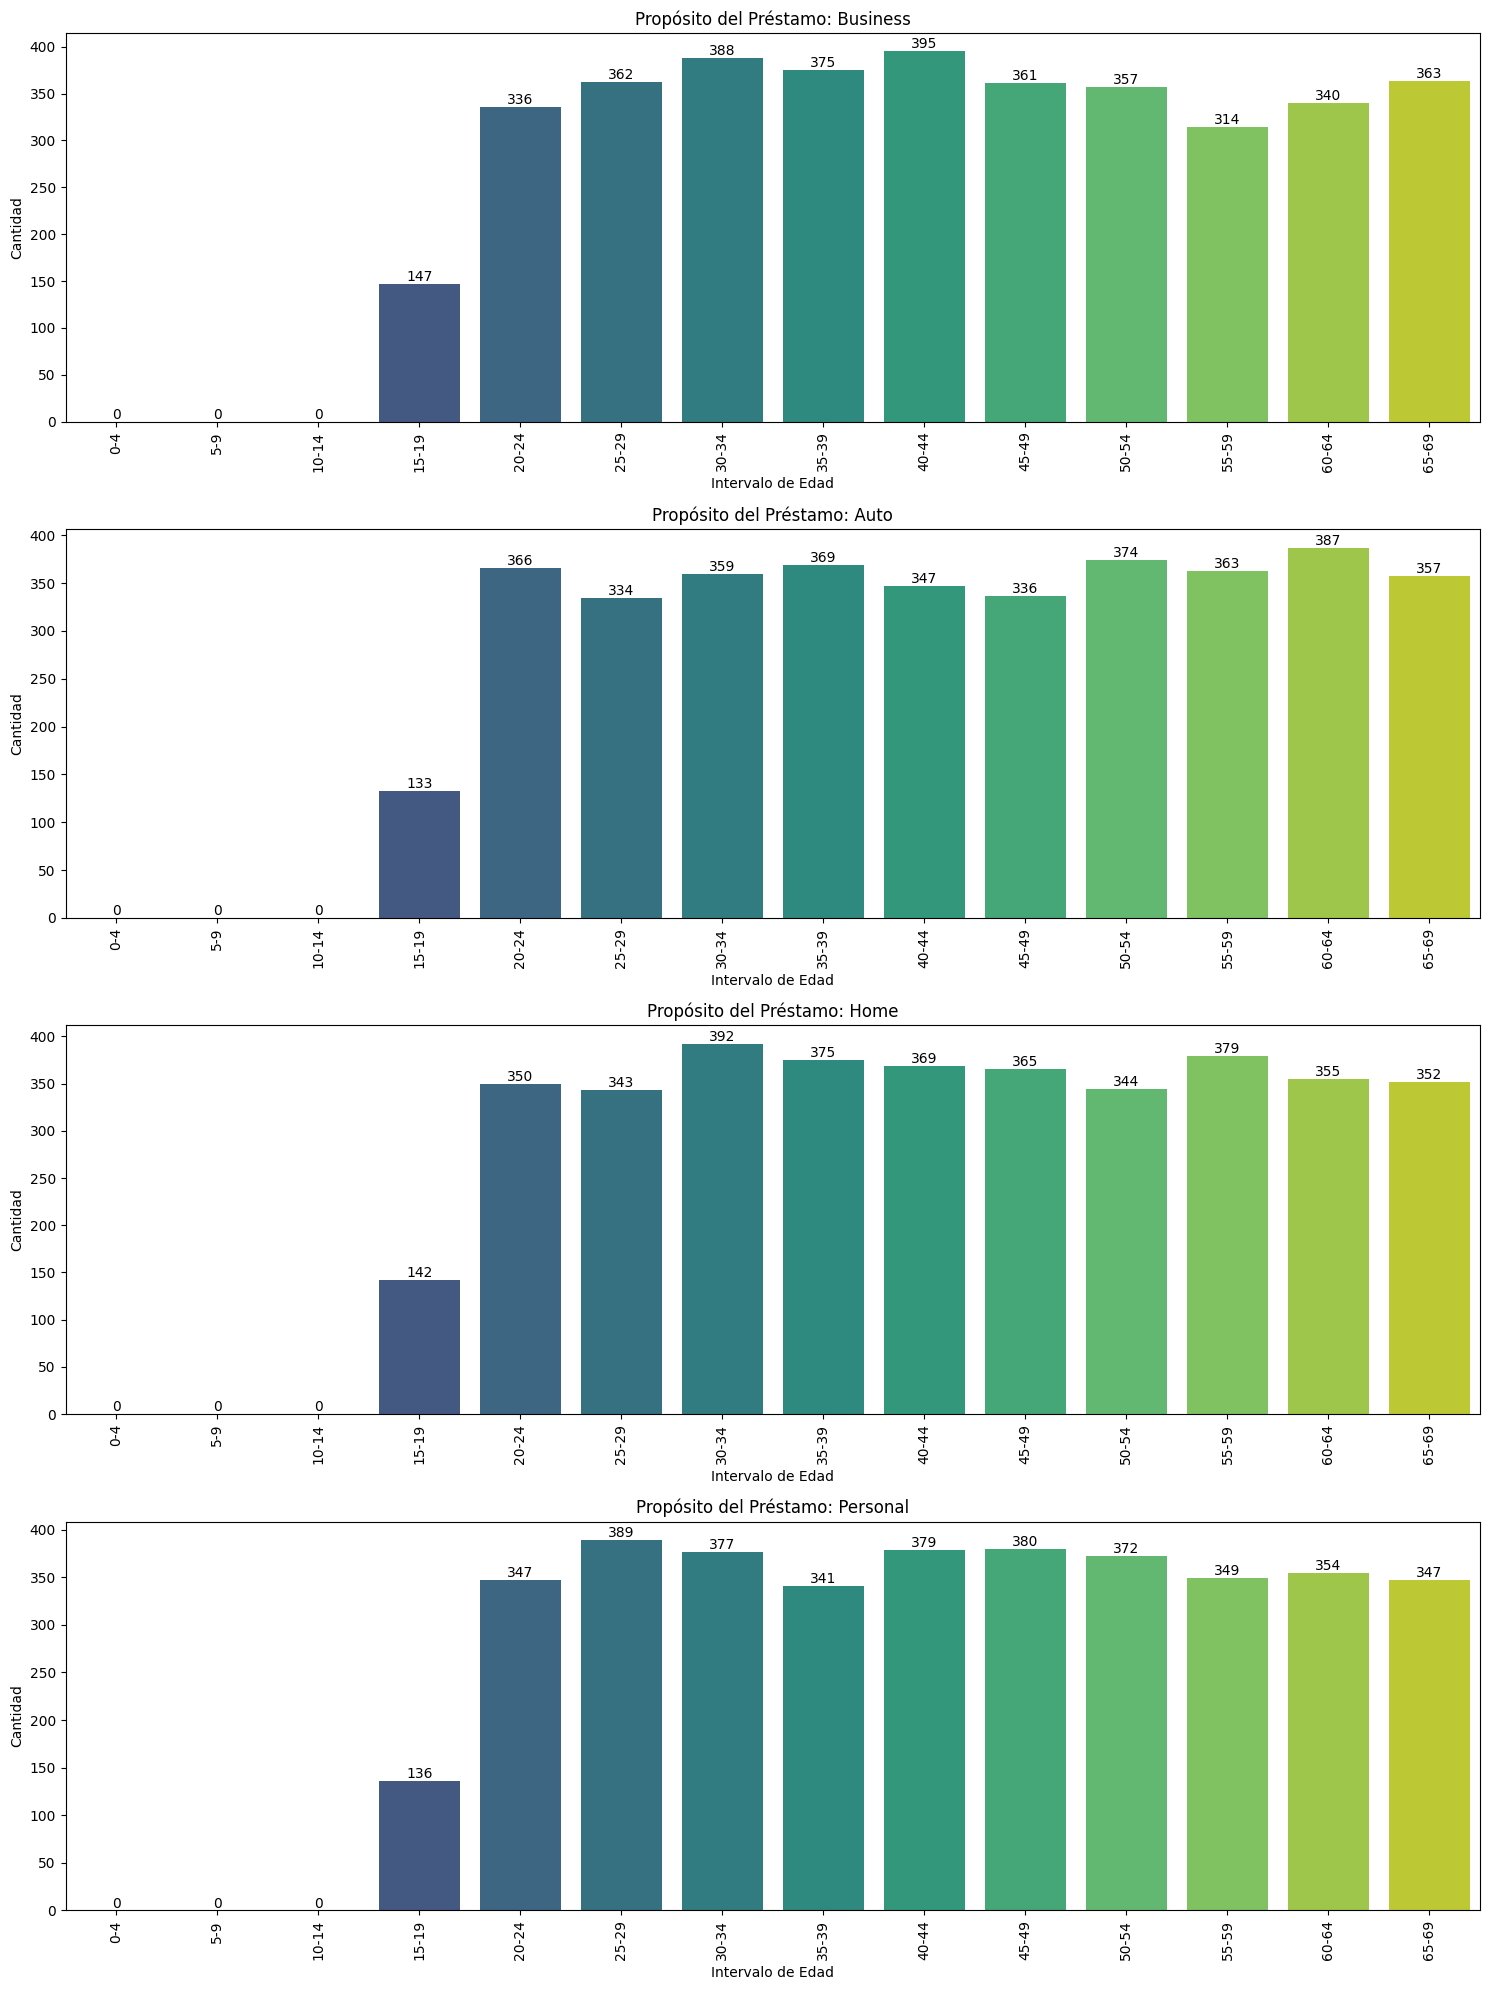

In [76]:
# Intervalos de edad
intervalo = range(0, ac['Age'].max() + 5, 5)
etiqueta = [f'{i}-{i+4}' for i in intervalo[:-1]]

# Agregar una columna de intervalos de edad al DataFrame
ac['intervalo por edad'] = pd.cut(ac['Age'], bins=intervalo, labels=etiqueta, right=False)

# Propósitos de préstamos únicos
propositos_prestamo = ac['Loan Purpose'].unique()

# Configurar la figura para los gráficos
plt.figure(figsize=(15, len(propositos_prestamo) * 5))

# Generar un gráfico para cada propósito del préstamo
for i, proposito in enumerate(propositos_prestamo, 1):
    plt.subplot(len(propositos_prestamo), 1, i)
    datos_filtrados = ac[ac['Loan Purpose'] == proposito]
    
    # Crear un DataFrame agrupado por intervalo de edad y contar las ocurrencias
    contar = datos_filtrados.groupby(['intervalo por edad']).size().reset_index(name='count')
    
    # Graficar los datos
    barplot = sns.barplot(data=contar, x='intervalo por edad', y='count', palette='viridis', ax=plt.gca())
    plt.title(f'Propósito del Préstamo: {proposito}')
    plt.xlabel('Intervalo de Edad')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=90)

    # Añadir los números en cada barra
    for p in barplot.patches:
        height = p.get_height()
        barplot.annotate(f'{int(height)}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='center', 
                         xytext=(0, 5), 
                         textcoords='offset points')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Grafico 5  
Las personas de 30 a 34 años presentan un mayor endeudamiento por motivos de casa y negocios; las personas entre 40 y 44 años presentan un endeudamiento por negocios y personal; finalmente, las personas entre 60 y 64 años presentan un mayor nivel de deuda por gastos en automóviles.

C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\3211609353.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=promedio_ingresos, x='Education Level', y='Income', palette='viridis')


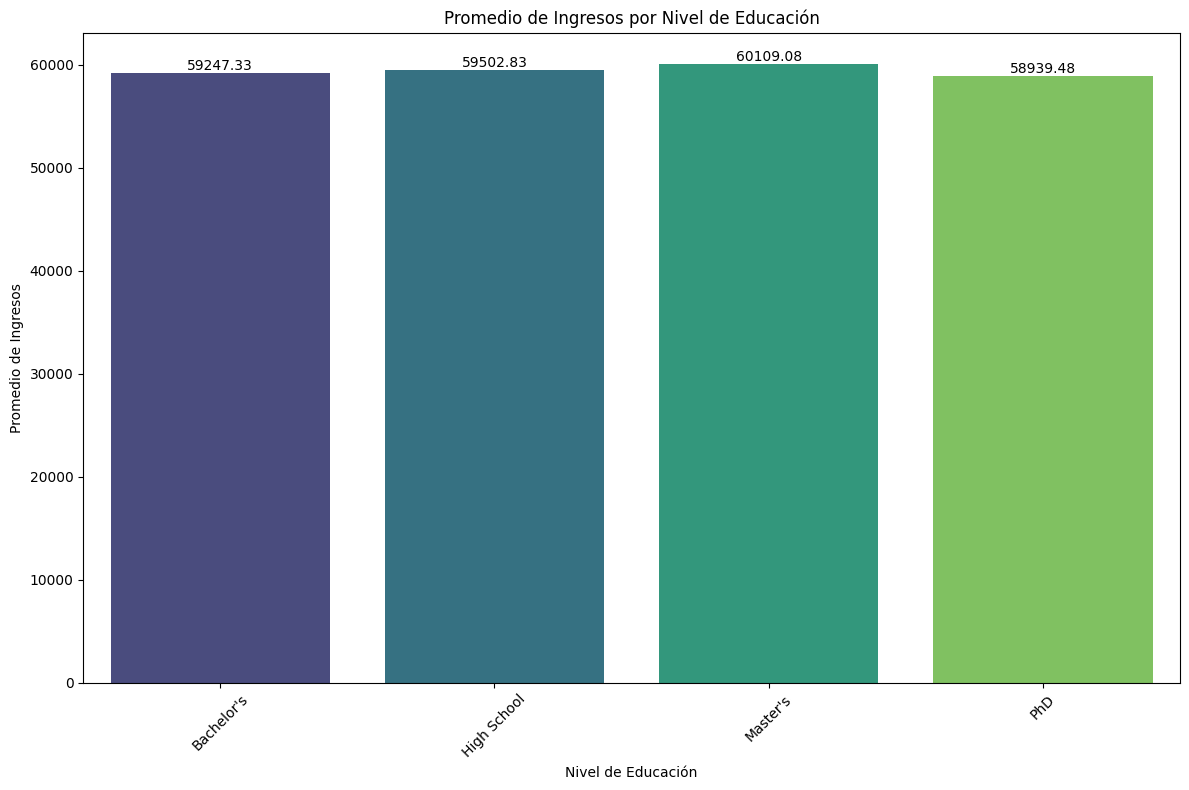

In [77]:
# Reemplazar los valores nulos en la columna de ingresos por 0
ac['Income'] = ac['Income'].fillna(0)

# Calcular el promedio de ingresos por cada nivel de educación
promedio_ingresos = ac.groupby('Education Level')['Income'].mean().reset_index()

# Configurar la figura para el gráfico
plt.figure(figsize=(12, 8))

# Graficar los datos
barplot = sns.barplot(data=promedio_ingresos, x='Education Level', y='Income', palette='viridis')

# Añadir los números en cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Títulos y etiquetas
plt.title('Promedio de Ingresos por Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Promedio de Ingresos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Grafico 6  
Las personas con grado académico de maestría presentan un mayor ingreso en comparación con el resto de las categorías; por el contrario, las personas con doctorado presentan el menor ingreso de todas las categorías.

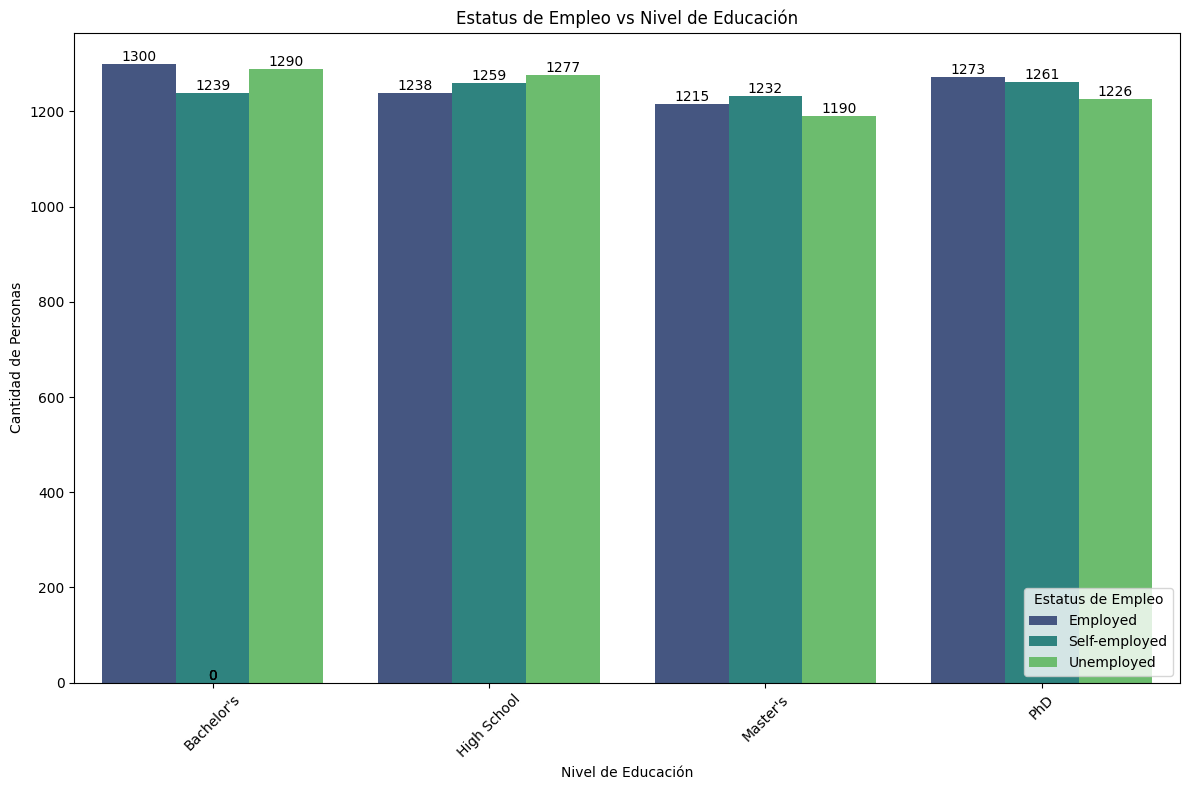

In [78]:
# Agrupar los datos por nivel de educación y estado de empleo, y contar las ocurrencias
empleo_por_educacion = ac.groupby(['Education Level', 'Employment Status']).size().reset_index(name='count')

# Configurar la figura para el gráfico
plt.figure(figsize=(12, 8))

# Graficar los datos
barplot = sns.barplot(data=empleo_por_educacion, x='Education Level', y='count', hue='Employment Status', palette='viridis')

# Añadir los números en cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Títulos y etiquetas
plt.title('Estatus de Empleo vs Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)
plt.legend(title='Estatus de Empleo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

 Grafico 7  
 Permite comparar el "estatus de empleo" versus el "nivel de educación". Podemos notar que los estudiantes de preparatoria y pregrado presentan una alta tasa de desempleo. Al alcanzar altos grados académicos como maestría o doctorado, se vuelven predominantes los grupos de empleados y trabajadores independientes. Por lo tanto, podemos concluir que las posibilidades de encontrar trabajo o una fuente de ingresos independientes aumentan a medida que aumenta el grado académico.

C:\Users\nicol\AppData\Local\Temp\ipykernel_22880\3736936627.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empleo_por_edad = ac.groupby(['intervalo por edad', 'Employment Status']).size().reset_index(name='count')


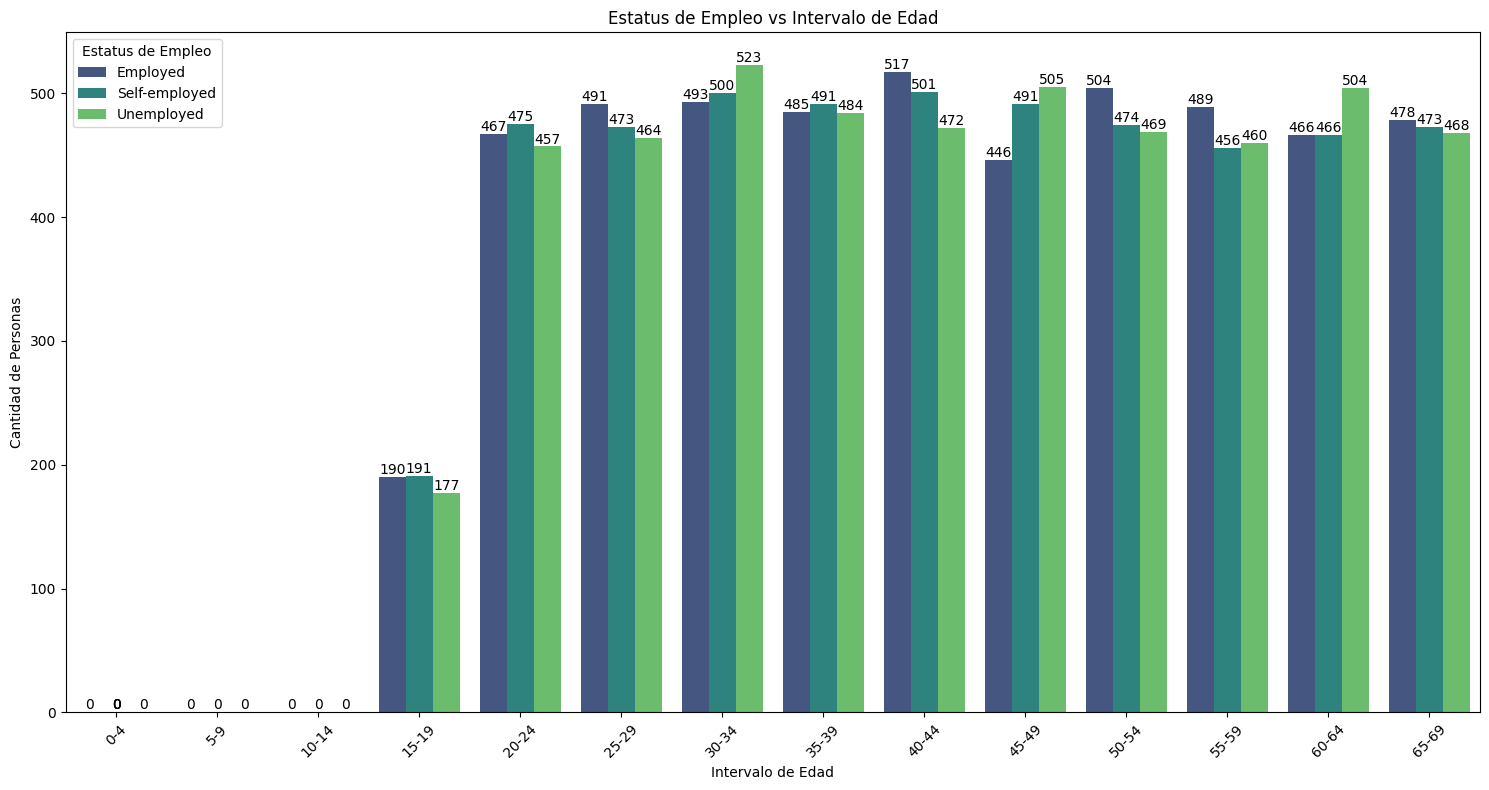

In [79]:
# Crear intervalos de edad
intervalo = range(0, ac['Age'].max() + 5, 5)
etiqueta = [f'{i}-{i+4}' for i in intervalo[:-1]]

# Agregar una columna de intervalos de edad al DataFrame
ac['intervalo por edad'] = pd.cut(ac['Age'], bins=intervalo, labels=etiqueta, right=False)

# Agrupar los datos por intervalo de edad y estado de empleo, y contar las ocurrencias
empleo_por_edad = ac.groupby(['intervalo por edad', 'Employment Status']).size().reset_index(name='count')

# Configurar la figura para el gráfico
plt.figure(figsize=(15, 8))

# Graficar los datos
barplot = sns.barplot(data=empleo_por_edad, x='intervalo por edad', y='count', hue='Employment Status', palette='viridis')

# Añadir los números en cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Títulos y etiquetas
plt.title('Estatus de Empleo vs Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)
plt.legend(title='Estatus de Empleo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Grafico 8  
En los intervalos de 30 a 34 y 60 a 64 se producen los máximos de desempleo en toda la muestra. Entre los 40 y 44 años se encuentran los máximos de empleados y trabajadores independientes.

 
Conclusiones Independientes.  
  
1) Riesgo Concentrado en Edades Claves  
Los datos muestran que las personas entre 30-34 años y 60-64 años presentan los mayores niveles de riesgo financiero. Esto sugiere que los programas de gestión de riesgos financieros y educación financiera podrían tener un impacto significativo si se dirigen específicamente a estos grupos de edad.  
  
2) Dilema del Nivel Educativo y Riesgo  
A pesar de que se espera que niveles educativos más altos conduzcan a menores riesgos financieros, el hallazgo de que personas con doctorado presentan altos niveles de riesgo y bajos ingresos desafía esta suposición. Esto sugiere que hay factores adicionales que afectan la estabilidad financiera de las personas con altos niveles educativos, los cuales deben ser estudiados en mayor profundidad.   

3) motivaciones de Endeudamiento por Edad  
Las diferencias en los motivos de endeudamiento según la edad destacan la importancia de personalizar las ofertas y términos de crédito según las necesidades específicas de cada grupo etario. Por ejemplo, los programas de préstamos para vivienda podrían ser más efectivos si se enfocan en personas de 30-34 años, mientras que las ofertas para automóviles podrían dirigirse a personas de 60-64 años.  
  
4) Impacto del Desempleo en Riesgo Financiero  
El alto riesgo financiero en personas de 30-34 años coincide con una alta tasa de desempleo en este grupo, subrayando la necesidad de políticas de empleo y apoyo financiero para jóvenes adultos. Mejorar las oportunidades de empleo en este rango de edad podría reducir significativamente el riesgo financiero.  

5) Relación Entre Educación, Empleo y Ingreso  
El hecho de que las personas con maestría y doctorado tengan mayores tasas de empleo y trabajos independientes sugiere que la educación avanzada aumenta la seguridad laboral. Sin embargo, la discrepancia en ingresos entre niveles educativos altos y bajos indica que la calidad y tipo de empleo obtenido con cada nivel educativo varía considerablemente.   

6) Gestión de Riesgo Personalizadas  
Dada la diversidad en niveles de riesgo y motivos de endeudamiento, es crucial que las instituciones financieras desarrollen estrategias de gestión de riesgo personalizadas. Estas estrategias deberían considerar tanto el nivel educativo como la edad para abordar de manera más efectiva las necesidades y riesgos de los clientes.   
  
Conclusión  
  
Los hallazgos del análisis destacan la importancia de adoptar un enfoque personalizado en la gestión de riesgos financieros, considerando tanto la edad como el nivel educativo de los individuos. Las personas entre 30-34 y 60-64 años presentan los mayores niveles de riesgo, influenciados por factores como el desempleo y las motivaciones específicas de endeudamiento. A pesar de la alta tasa de empleo entre aquellos con maestría y doctorado, el dilema de sus bajos ingresos sugiere que la calidad del empleo varía significativamente según el nivel educativo. Estos resultados subrayan la necesidad de políticas de empleo específicas, educación financiera dirigida y estrategias de crédito adaptadas para abordar las necesidades y riesgos particulares de cada grupo. Una investigación más profunda con mayor información es crucial para entender las disparidades observadas y diseñar intervenciones que reduzcan efectivamente el riesgo financiero en los diferentes segmentos de la población.  